Looking at data from runs on Feb 9
- generated weights, tract lengths and conduction velocity, 10 nodes 
- 3 runs estimating weights
- 3 runs estimating conduction velocity
- (all random initial conditions)

Trying to see if we only get multiple solutions when we look at weights and not delays/conduc velocity

constnat initial conditions and estimating weights - Feb 12

In [1]:
import sys
import glob
import numpy as np
import seaborn as sns


OUTPUT_PATH = '/scratch/l/lfefebvr/noorir/model/Output/'

Quick Look

In [ ]:
import helper_functions as hf
thing = np.load("/scratch/l/lfefebvr/noorir/model/Output/2019-02-09/934051/rank22_0.048978217976386185.npy")
new = hf.p2matrix(thing, 10)

Extra Helper Functions

In [2]:
def plot_ts(nodes, all_ts):


    plt.figure(2, figsize=(40, 6))
    for sing_node in range(nodes):
        plt.plot(np.array(all_ts)[sing_node])

    plt.show()

Choosing which jobs to analyze

In [3]:
# CHANGE THIS CELL ACCORDING TO DATA YOU ARE ANALYZING
"""
estimating weights:

934104
934105
934106

 934107
 934108
 934109
estimating cond vel


"""
NTASKS =40
JOB = ['934104', '934105', '934106','934107','934108','934109']
NUM_JOBS = len(JOB)

Loading all the data we need for analysis

In [4]:
# Loading variable file names we will use for analysis into a dictionary

load_files = {} #names of all the load_vars_ts_delays files

for job in JOB:
    var = glob.glob(OUTPUT_PATH+"*/"+job+"/"+"load_genvars_delay*")
    if len(var) ==1:
        load_files[job] = glob.glob(OUTPUT_PATH+"*/"+job+"/"+"load_genvars_delay*")[0]
        
        
if len(load_files.keys()) == len(JOB):
    print("Loaded vars files successfully", len(JOB))
load_files

Loaded vars files successfully 6


{'934104': '/scratch/l/lfefebvr/noorir/model/Output/2019-02-09/934104/load_genvars_delays2.py',
 '934105': '/scratch/l/lfefebvr/noorir/model/Output/2019-02-09/934105/load_genvars_delays3.py',
 '934106': '/scratch/l/lfefebvr/noorir/model/Output/2019-02-09/934106/load_genvars_delays4.py',
 '934107': '/scratch/l/lfefebvr/noorir/model/Output/2019-02-09/934107/load_genvars_delays5.py',
 '934108': '/scratch/l/lfefebvr/noorir/model/Output/2019-02-09/934108/load_genvars_delays6.py',
 '934109': '/scratch/l/lfefebvr/noorir/model/Output/2019-02-09/934109/load_genvars_delays7.py'}

In [5]:
# Retreive the best solution - all_res is dict with arrays with the conduction 
# velocities vector that had the lowest MSE at the end of the diff evol algorithm

all_res = {} #dictionary of all the solution arrays
i=0
for job in JOB:
    full_list = glob.glob(OUTPUT_PATH+"*/"+job+"/"+"rank*") #list of all results for a single job
    if len(full_list) == NTASKS:
        low = 1
        for res in full_list:
            start = res.index("_")+1
            end = res.index(".npy")
            if float(res[start:end])< low:
                low = float(res[start:end])
        print(i," Job: "+job+", lowest MSE: ", low)
        i = i+ 1
        final_res = glob.glob(OUTPUT_PATH+"*/"+job+"/"+"rank*"+str(low)+"*")[0]
        all_res[job]= np.load(final_res)
    else:
        print("Error", job)
        break

0  Job: 934104, lowest MSE:  0.01925446942930942
1  Job: 934105, lowest MSE:  0.03342477821022694
2  Job: 934106, lowest MSE:  0.012376579047810775
3  Job: 934107, lowest MSE:  0.11089532730748651
4  Job: 934108, lowest MSE:  0.039695162399275945
5  Job: 934109, lowest MSE:  0.18848603561460422


# STARTING ANALYSIS

Plotting all histograms of all the conduction vel / weights estimates

1 JOB #:  934104 min: 0.029444660484719443 max: 0.9834919553658488 avg: 0.5286620342326875
2 JOB #:  934105 min: 0.043679520889414736 max: 0.9530456930481366 avg: 0.5201115295648655
3 JOB #:  934106 min: 0.024386141108303505 max: 0.9665947029434645 avg: 0.46611040363055023
4 JOB #:  934107 min: 2210.62769909811 max: 7843.859531764934 avg: 5203.3060536190005
5 JOB #:  934108 min: 2026.6936666651363 max: 7700.39548224906 avg: 4714.7956204150105
6 JOB #:  934109 min: 2096.608787210427 max: 7991.48427435292 avg: 5366.654323110399


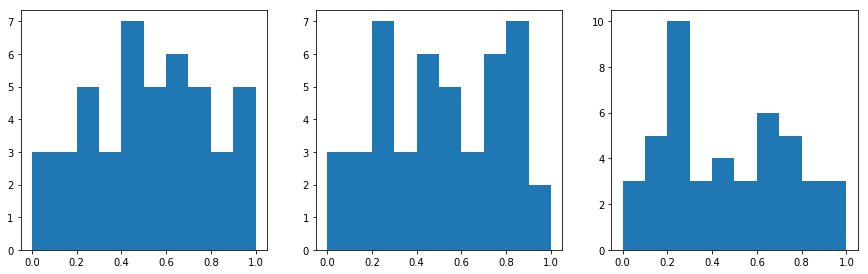

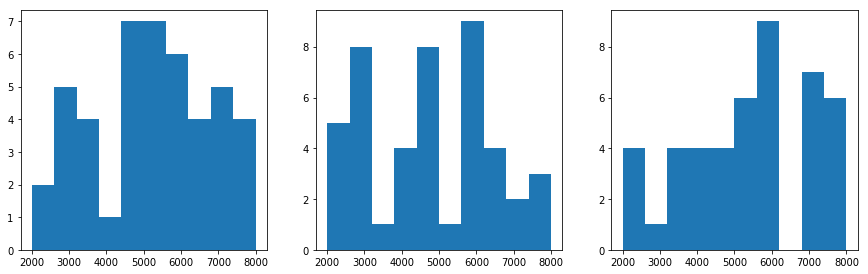

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15.0,15.0))
for i in range(3): 
    plt.subplot(3, 3, i+1)


    print(i+1, "JOB #: ", JOB[i], "min: {} max: {} avg: {}".format(np.min(all_res[JOB[i]]), 
                                                                   np.max(all_res[JOB[i]]), np.average(all_res[JOB[i]])))
    plt.hist(all_res[JOB[i]], range= (0,1))
    #row major counting
plt.figure(figsize=(15.0,15.0))
for i in range(3,6): 
    plt.subplot(3, 3, i+1)


    print(i+1, "JOB #: ", JOB[i], "min: {} max: {} avg: {}".format(np.min(all_res[JOB[i]]), 
                                                                   np.max(all_res[JOB[i]]), np.average(all_res[JOB[i]])))
    plt.hist(all_res[JOB[i]], range= (2000,8000))

In [ ]:
left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure

top = 0.9      # the top of the subplots of the figure
wspace = 0.2   # the amount of width reserved for blank space between subplots
hspace = 0.2   # the amount of height reserved for white space between subplots

Looking at correlation matrices and delay matrices

In [ ]:
# ALL THE RESULTS AT ONCE

# estimated correlation plot on top
# estimated delay matrix on the bottom

rows = 2
cols = NUM_JOBS
i = 0
f, ax = plt.subplots(rows,cols, figsize=(10, 10))
f.tight_layout()
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=hspace)

#for r in range(rows):
for c in range(cols):
    exec(open(load_files[JOB[i]]).read()) #loading variables into the environment
    ind = 0
    cmat = np.ones((nodes, nodes))
    for row in range(0,nodes):
        for col in range(row+1, nodes):
            cmat[row,col] = all_res[JOB[i]][ind]
            cmat[col,row] = all_res[JOB[i]][ind]
            ind += 1
    cmat = np.reciprocal(cmat, where = cmat>0)
    ue_array, _, delays = hf.wcm.wc_modelsim_c(wc_params, tract_mat, cmat, nodes,
                                   seed_num = wc_seed)

    exp_data = hf.plot_cor_mat(ue_array, nodes, skip)

    np.fill_diagonal(exp_data, 0)
#     sns.heatmap(exp_data, vmax = 1, vmin = -1,  ax = ax[0,c])
#     ax[0,c].set_title("JOB #: {}".format(JOB[i]))
#     ax[0,c].aspect='auto'
    
#     sns.heatmap(delays, vmax =3, ax = ax[1,c])
#     ax[1,c].aspect='auto'
    
    cax = ax[0,c].imshow(exp_data, aspect='equal', vmax = 1, vmin = -1)
    cax = ax[1,c].imshow(delays, aspect='equal', vmax = 3)

    i = i+1


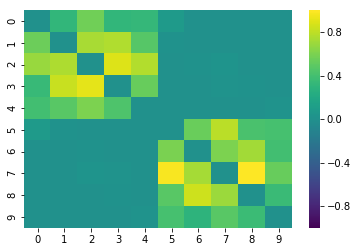

In [9]:
sns.heatmap(w_mat, vmax = 1, vmin = -1, cmap = "viridis")

/gpfs/fs0/scratch/l/lfefebvr/noorir/model/helper_functions.py:11: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/scinet/niagara/software/2018a/opt/base/anaconda3/5.1.0-hub/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/scinet/niagara/software/2018a/opt/base/anaconda3/5.1.0-hub/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/scinet/niagara/software/2018a/opt/base/anaconda3/5.1.0-hub/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/scinet/niagara/software/2018a/opt/base/anaconda3/5.1.0-hub/lib/python3.6/site-packages/traitlets/config/application.py", line 658, i

here
2000
10


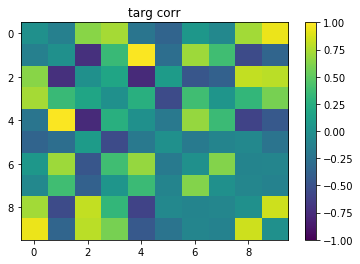

10


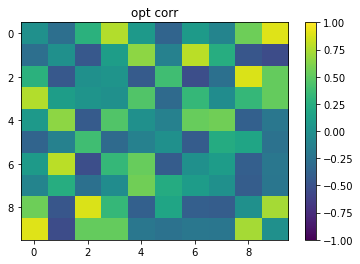

MSE 0.0192544694293
10


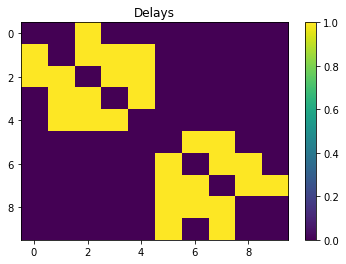

10


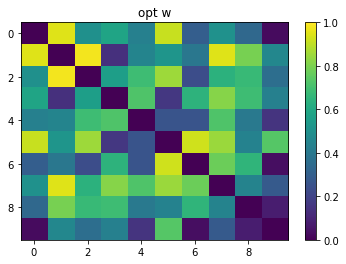

0.00025
here
2001
10


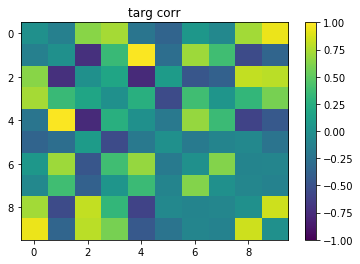

10


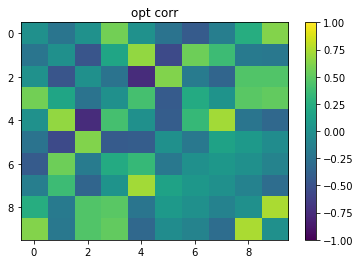

MSE 0.0334247782102
10


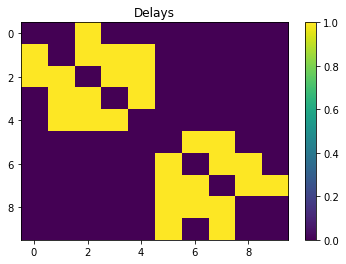

10


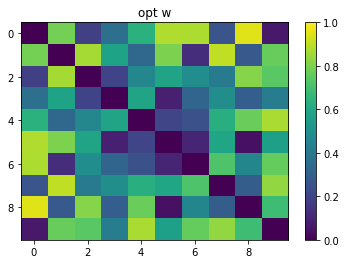

0.00025
here
2002
10


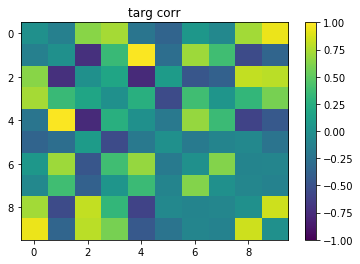

10


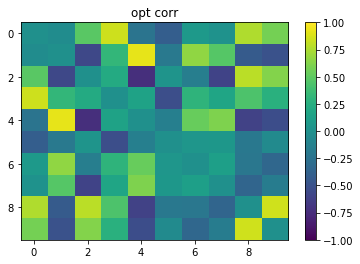

MSE 0.0123765790478
10


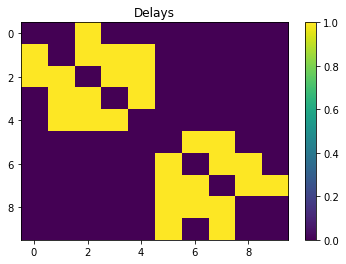

10


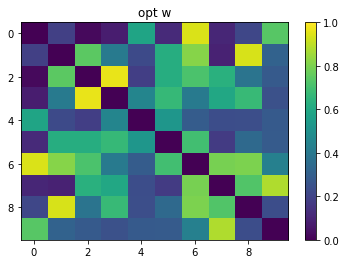

0.00025
here
2002
10


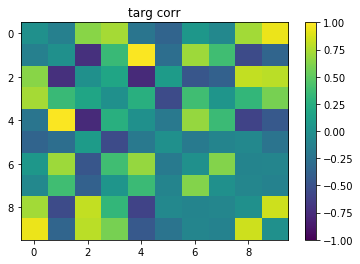

10


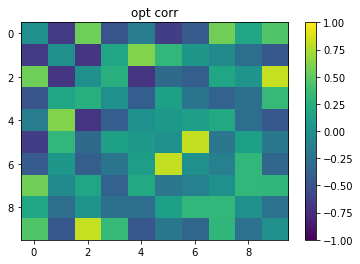

MSE 0.110895327307
10


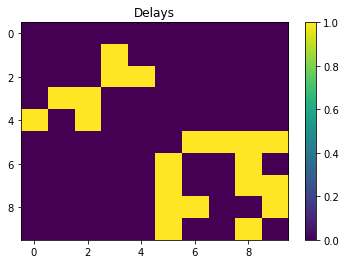

10


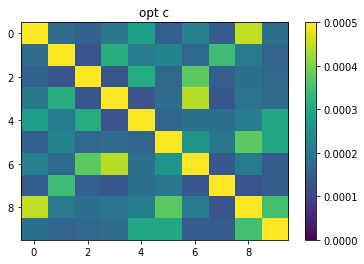

1.0
here
2001
10


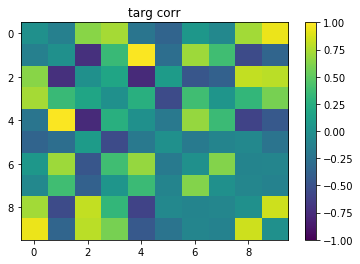

10


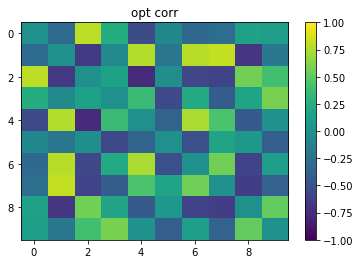

MSE 0.0396951623993
10


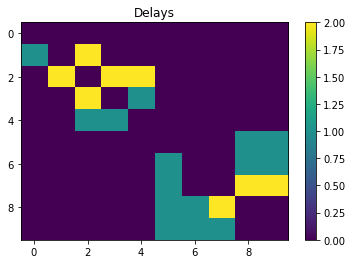

10


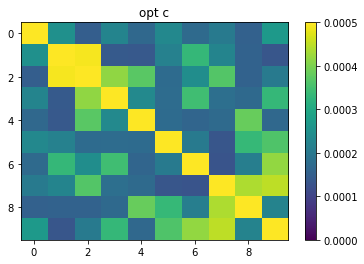

1.0
here
2000
10


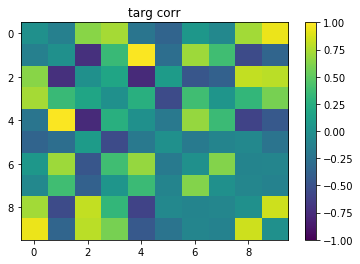

10


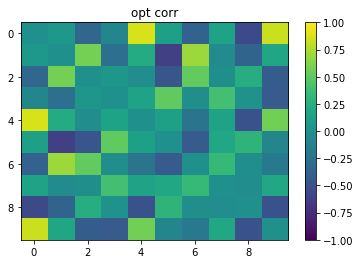

MSE 0.188486035615
10


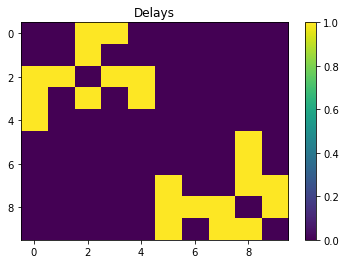

10


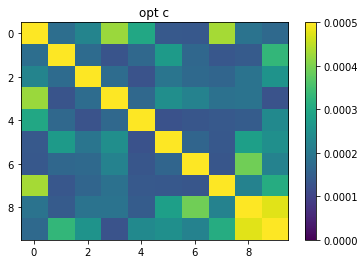

1.0


In [7]:
# THE RESULTS ONE BY ONE

for i in range(NUM_JOBS):
    exec(open(load_files[JOB[i]]).read()) #loading variables into the environment
    c = all_res[JOB[i]]
    if evol_params['optim'] =='w':
        MAT = c_mat
    elif evol_params['optim'] =='c':
        MAT = w_mat
    res, cmat, _, _ = hf.residuals_cw_corr(c, wc_params, targ_data, nodes, tract_mat, MAT, skip, wc_seed, evol_params['optim'], True)
    print(np.max(cmat))
#     ind = 0
#     cmat = np.ones((nodes, nodes))

#     for row in range(0,nodes):
#         for col in range(row+1, nodes):
#             cmat[row,col] = c[ind]
#             cmat[col,row] = c[ind]
#             ind += 1
    
#     ue_array, _, delays = hf.wcm.wc_model_sim_new(wc_params, tract_mat, c_mat, w_mat, nodes,
#                                        seed_num = network_seed)

#     exp_data = hf.plot_cor_mat(ue_array, nodes, skip)


#     #quantity we are trying to minimize is the mse 
#     res = hf.mse(np.triu(targ_data,1).ravel(),np.triu(exp_data,1).ravel())
#     plt.hist(np.triu(delays,1).ravel(), range=(0,3))

#     np.fill_diagonal(exp_data, 0)
#     hf.plot_mat(targ_data, "targ corr", 1, -1)
#     hf.plot_mat(exp_data,"opt corr", 1, -1)
#     print("MSE", res, " JOB: JOB[i]")
#     hf.plot_mat(delays,"Delays", _max = 3)


Plot of MEG time series of Target Data

In [ ]:
plot_ts(nodes, all_ts)

Conclusion: Doesn't seem like there's multiple solutions of delays - from the matrices

Histograms of the delays and the conduction velocities look like from same distribution

Neither weights or conduction velocity was estiamted correctly, we were expecting a narrow distribution of the conduction velocities since the trye value was constant across all nodes. The weights also did not have a pattern similar to the true matrix
